#Assignment 3 Ayeza Nasir an05918


In [3]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

Part 1

In [4]:
Fig1 = pd.read_csv('loan_small.csv')
Fig1.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,application_type
0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,...,5831.78,5000.00,861.07,0.00,0.00,0.00,Jan-15,171.62,Jan-16,INDIVIDUAL
1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,...,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,INDIVIDUAL
2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,...,3003.65,2400.00,603.65,0.00,0.00,0.00,Jun-14,649.91,Jan-16,INDIVIDUAL
3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,...,12226.30,10000.00,2209.33,16.97,0.00,0.00,Jan-15,357.48,Jan-15,INDIVIDUAL
4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,B5,...,3242.17,2233.10,1009.07,0.00,0.00,0.00,Jan-16,67.79,Jan-16,INDIVIDUAL


For Loan Status , Term and Emp_Length

In [5]:
# loan_status
Replacement = {'Fully Paid': 'Good Status', 'Current': 'Good Status', 'Charged Off': 'Bad Status','Default':'Bad Status','Late (31-120 days)': 'Bad Status'}
Fig1['loan_status'] = Fig1['loan_status'].replace(Replacement)
Fig1['loan_status']
status_counter = Fig1['loan_status'].value_counts().reset_index()
status_counter.columns = ['Loan Status', 'Count']
status_counter = pd.DataFrame(status_counter)
status_counter


,Loan Status,Count
0,Good Status,820
1,Bad Status,179


In this scenario 820 people are observed to have a good standing status where as the rest 179 have a bad status.

In [6]:
# term
Fig1['term'] = Fig1['term'].str.strip('months').astype('int')

In [7]:
#emp_length
Fig1.emp_length.fillna(value=0, inplace=True)
Fig1['emp_length'].replace(to_replace='[^0-9]+', value='', inplace=True, regex=True)
Fig1['emp_length'] = Fig1['emp_length'].astype(int)

Fig1['emp_length']
emp_length_counts = Fig1['emp_length'].value_counts().reset_index()
emp_length_counts.columns = ['Emp Length', 'Count']

counts = emp_length_counts['Count'].sum()
mean,median , mode, min , max  = round(Fig1['emp_length'].mean(), 2) , Fig1['emp_length'].median(), Fig1['emp_length'].mode().get(0), Fig1['emp_length'].min(),  Fig1['emp_length'].max()

data = {
    'Count': [counts],
    'Min': [min],
    'Max': [max],
    'Mean': [mean],
    'Median': [median],
    'Mode': [mode],
    
}

emp_len_stats = pd.DataFrame(data)
emp_len_stats.style.set_caption('Emp Length Stats')
emp_len_stats


,Count,Min,Max,Mean,Median,Mode
0,999,0,10,5.27,5.0,10


The average lenghth of employment length observed in the data is 5.27 years. The maximium time an employ has been employed is 10 years where as the minimum is 0.

For "mths_since_last_delinq" and "mths_since_last_record"

In [8]:
# Take median to replace missing values..
Fig1['mths_since_last_delinq'] = Fig1['mths_since_last_delinq'].fillna(Fig1['mths_since_last_delinq'].median(), inplace = True)
Fig1['mths_since_last_record'] = Fig1['mths_since_last_record'].fillna(Fig1['mths_since_last_record'].median(), inplace = True)


Adding NULL values to "emp_title" and "last_pymnt_d" 

In [9]:
Fig1['emp_title'] = Fig1['emp_title'].fillna(value = '')
Fig1['last_pymnt_d'] = Fig1['last_pymnt_d'].fillna(value = '')

#Data Set has been refined now for Part 2 a summary is provided: 

In [10]:
# Diaplay statistics in accordance with the updated CSV
Fig1.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,emp_length,annual_inc,...,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt
count,9.990000e+02,9.990000e+02,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,...,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000
mean,1.060005e+06,1.291575e+06,12704.354354,12197.797798,12137.165302,42.582583,12.961331,366.992743,5.274274,62118.790330,...,393.475025,392.977998,13218.969378,13123.601622,10395.572492,2703.640891,1.081158,118.674915,9.817802,2762.736486
std,1.602660e+04,2.112723e+04,7463.253235,6804.931895,6743.323264,10.712911,3.881742,200.510423,3.390256,31899.138102,...,1372.152659,1370.738354,8515.600032,8384.022752,6727.488181,2757.603166,6.533628,606.058706,87.107689,4426.094619
min,7.659270e+05,9.431350e+05,1000.000000,1000.000000,1000.000000,36.000000,6.030000,33.940000,0.000000,12000.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.058868e+06,1.290204e+06,7050.000000,7000.000000,7000.000000,36.000000,9.910000,223.440000,2.000000,40000.000000,...,0.000000,0.000000,6903.943290,6894.465000,5110.360000,960.535000,0.000000,0.000000,0.000000,281.185000
50%,1.061891e+06,1.293501e+06,11500.000000,11000.000000,10800.000000,36.000000,12.690000,337.750000,5.000000,55000.000000,...,0.000000,0.000000,11599.078020,11593.400000,9600.000000,1807.880000,0.000000,0.000000,0.000000,530.780000
75%,1.065345e+06,1.299062e+06,16050.000000,16000.000000,15946.571055,60.000000,15.960000,469.235000,9.000000,75500.000000,...,0.000000,0.000000,17559.547470,17404.910000,14000.000000,3279.710000,0.000000,0.000000,0.000000,3516.275000
max,1.077501e+06,1.314167e+06,35000.000000,35000.000000,35000.000000,60.000000,23.910000,1243.850000,10.000000,276000.000000,...,10069.400000,10062.140000,45755.229980,44519.610000,35000.000000,19834.120000,94.480000,11349.520000,2043.180000,28412.430000


1.The mean for interest rate offered in this data is observed to be 12.96%.

2.The count for each column is consistent which proves that the null value shave been accounted for and there are no discripancies or gaps in the data.

3.For higher annual income the mean interest rates that are observed are higher for earner that make $ 61,000 in annual income.

4.The interest rates are not very linear or equally distributed in range for example income of 32,000. has an interest rate of 3.8% Where annual income of 55000 dollars and $ 62,000 are both close to approximayely 13% insterest rate.

5.The maximum interest rate is observed to be approximately 24% for $ 276,000

In [11]:
debt_count = Fig1['purpose'].value_counts().debt_consolidation
card_count = Fig1['purpose'].value_counts().credit_card
miscellaneous_count = Fig1['purpose'].value_counts().other
homeexp_count = Fig1['purpose'].value_counts().home_improvement
businessexp_count=Fig1['purpose'].value_counts().small_business
carexp_count=Fig1['purpose'].value_counts().car
purchases_count=Fig1['purpose'].value_counts().major_purchase
medical_count=Fig1['purpose'].value_counts().medical
wedding_count=Fig1['purpose'].value_counts().wedding
vacation_count=Fig1['purpose'].value_counts().vacation
house_count=Fig1['purpose'].value_counts().house
commute_count=Fig1['purpose'].value_counts().moving
fuel_count=Fig1['purpose'].value_counts().renewable_energy

#Univariate Analysis

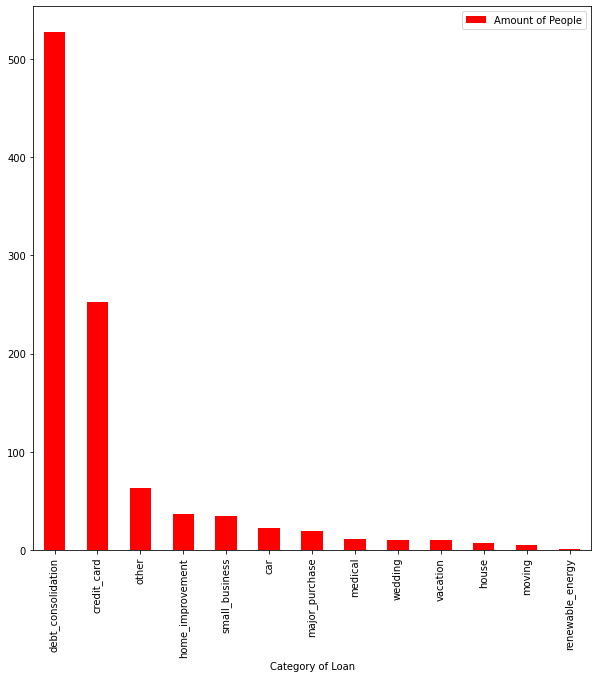

In [47]:
Diagram = pd.DataFrame({'Category of Loan':['debt_consolidation', 'credit_card', 'other', 'home_improvement', 'small_business', 'car', 'major_purchase', 
'medical', 'wedding', 'vacation', 'house', 'moving', 'renewable_energy'], 'Amount of People':[debt_count, card_count, miscellaneous_count, homeexp_count, businessexp_count,
carexp_count, purchases_count, medical_count, wedding_count, vacation_count, house_count, commute_count, fuel_count]})
D1= Diagram.plot.bar(x='Category of Loan', y='Amount of People', rot=90, figsize=(10,10), color='red')

Via Histogram these stats can be assessed and visualised easily , different people opt for taking a loan for a varying range of reasons, this carefully visualizes the categories and quatities if people that can be generally grouped. For this case most people take loans for being able to repay debt or credit card bills etc. The least amount of people are in the category which has taken loans to invest or pay for renewable energy.

Analysis on home_ownership count.
Categorising the types of homeownerhsip amongst poeple.



In [13]:
rent=Fig1['home_ownership'].value_counts().RENT
mortgage=Fig1['home_ownership'].value_counts().MORTGAGE
own=Fig1['home_ownership'].value_counts().OWN

Analysis Via Boxplot and Pie Chart

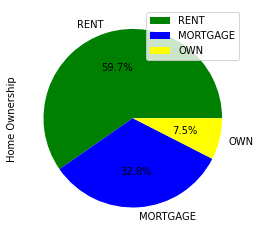

In [14]:
dataframe_ownership = pd.DataFrame({'Home Ownership': [rent, mortgage , own]},
                  index=['RENT', 'MORTGAGE', 'OWN'])
pallete=['green', 'blue', 'yellow']
plot_ownership = dataframe_ownership.plot.pie(y='Home Ownership', figsize=(4, 8), colors=pallete, autopct='%1.1f%%')

According to the displayed stats:
59.7 % of the homes are rented 32.8 % are on Mortgage whereas the least 7.5 % are owned. the pie chart also can be reflective to the bar chart above , as most loans are taken for home improvement and lesser are taken for the purpose of a house.


In [29]:
Fig1['int_rate'].value_counts().nlargest(30)

11.71    84
12.42    74
9.91     71
12.69    67
7.90     60
13.49    59
10.65    58
8.90     55
14.27    52
16.77    44
14.65    34
15.27    34
17.27    34
7.51     32
15.96    28
16.29    28
6.62     28
6.03     27
19.03    21
17.58    19
20.30    16
19.42    15
18.25    13
19.91    11
18.64     9
20.89     8
21.28     7
21.67     3
23.91     2
22.35     2
Name: int_rate, dtype: int64

In [28]:
data1=Fig1['int_rate'].value_counts()

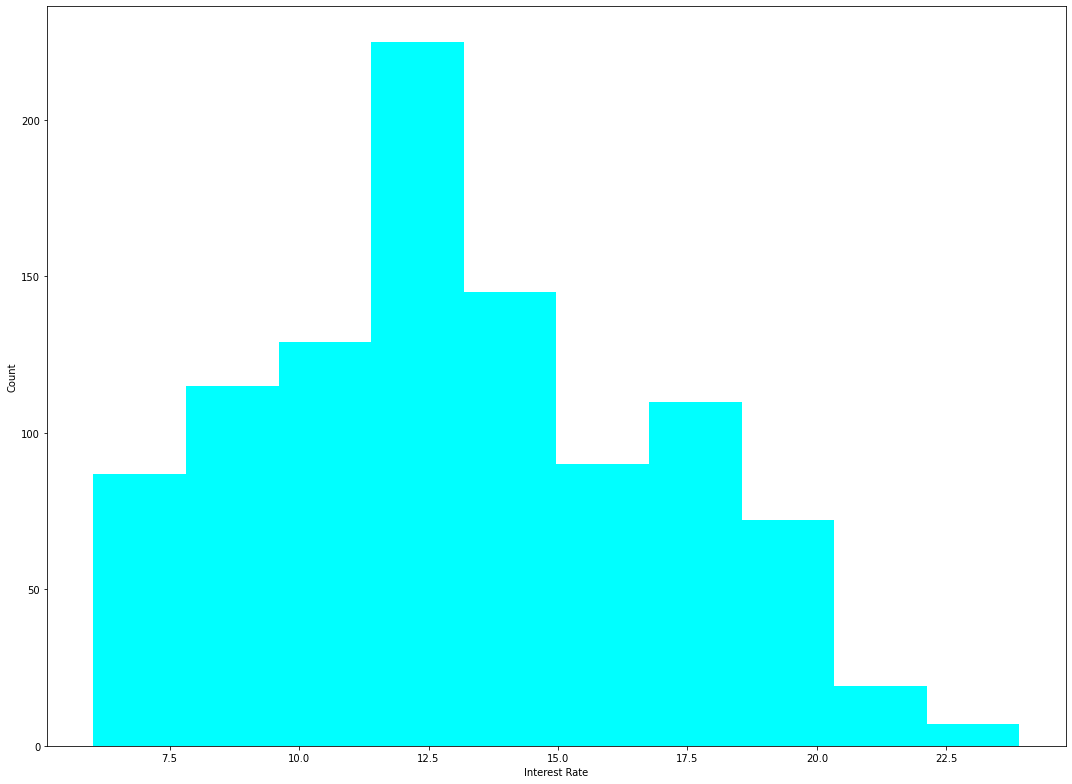

In [26]:
fig,ax = plt.subplots(1,1, figsize=(15, 11))
ax.hist(Fig1['int_rate'], color='cyan',bins=10)
ax.set_xlabel('Interest Rate')
ax.set_ylabel('Count')
plt.tight_layout()
plt.show()

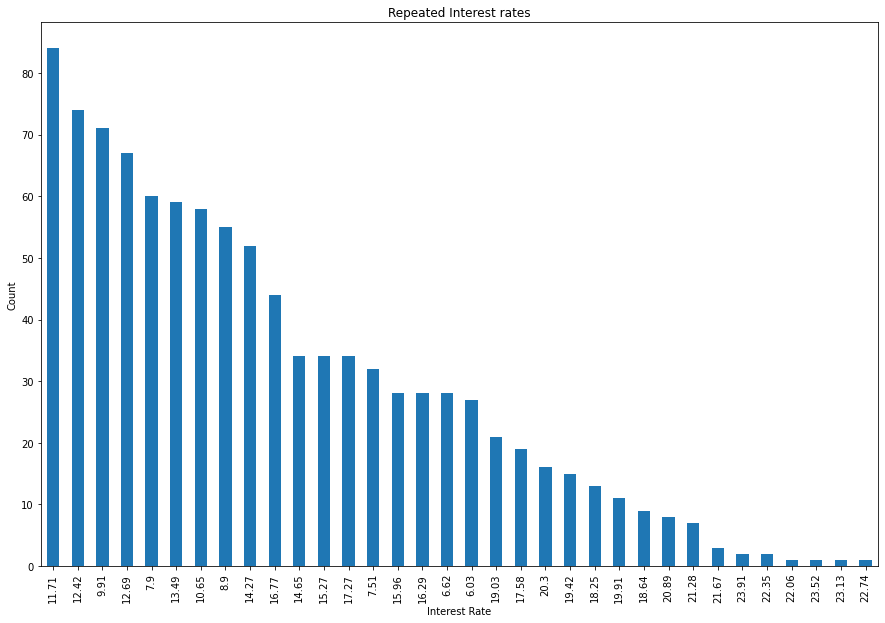

In [31]:
data1.plot(title='Repeated Interest rates', kind='bar', figsize=(15,10))
plt.ylabel("Count")
plt.xlabel("Interest Rate")
plt.show()

As assessed by the graphs above we can conclude which interest rate was used on how many ids. 11.71% was the most popular interest rate which was opted for 87 times as compared to 17.58 which was opted for only 19 times, which is also the minimum count.


#Bivariate Analysis

Scatter plot : As 'funded_amnt_inv' and installment are found to be continuous variables, they can be lotted to assess their correlations.

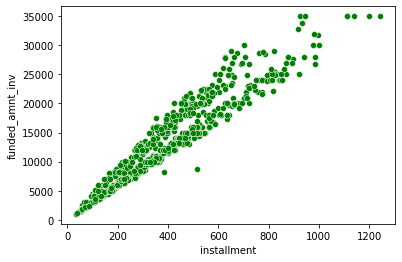

In [37]:
sns.scatterplot(data = Fig1, x="Installment", y="funded_amnt_inv", color='green',)

Concluding frpom the scatterplot, the observed pattern shows a direct relationship between these two continuous variables. As installments increase the funded amount invested also increases showing that these variables are related to each other, which we will later show it using correlation plot.

#Discrete vs Continuous

The purpose(discrete variable) and installment(continuous variable): Visualizing these via a bar chart assess if loan reputation affects the installment values or not.

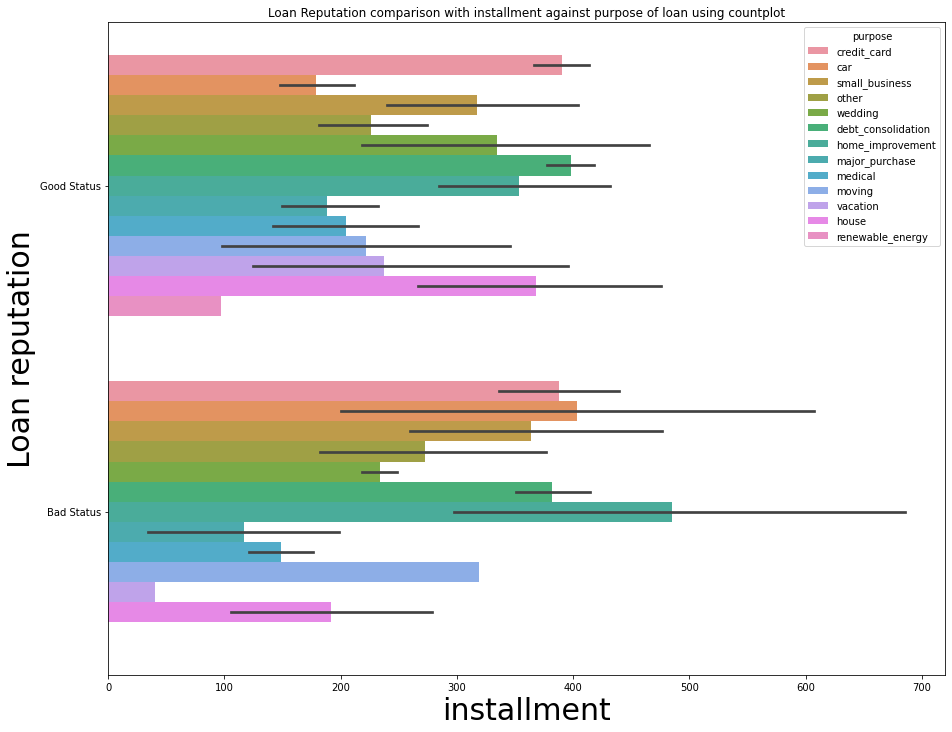

In [42]:
plt.figure(figsize = (15,12))
sns.barplot(data = Fig1, x = Fig1['installment'], y = 'loan_status', hue = Fig1['purpose'])
plt.title("Loan Reputation comparison with installment against purpose of loan using countplot")
plt.xlabel('installment', fontsize=30)
plt.ylabel("Loan reputation", fontsize=30)
plt.show()

In the above demonstrated bar chart bad reputation with respect to loan amount leads to greater number of installment values, compared toindividuals that have a good status which reflects that their loan is either paid off or current while bad status means that the loan is late, or default.

#Correlation Plot

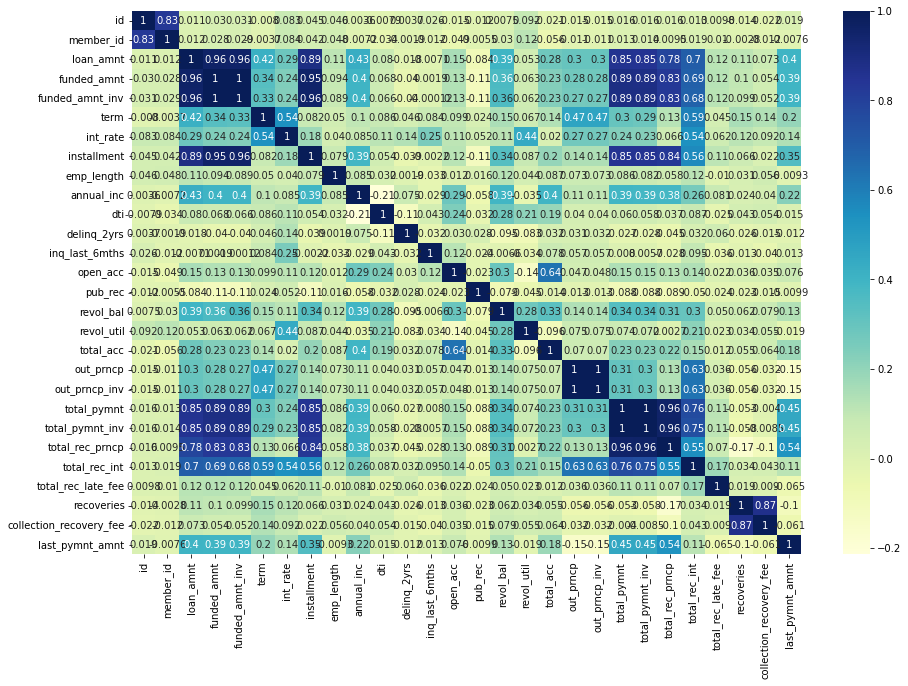

In [44]:
plt.figure(figsize = (15,10))
sns.heatmap(Fig1.corr(),cmap='YlGnBu',annot=True)
plt.show()

Correlation values greater than or equal to 0.5 indicate a higher degree of  correlation between two variables,whereas correlation values lesser than 0.5 indicate a weaker relationship between the two variables.Value of 1 in the diagonal is to be disregarded as two variables of the same type are completely related.

The following observations can be confirmed:

1. Funded amount and loan amount are positively correlated.
2. funded_amount_inv and installments are positively correlated
3. total_pymnt and total_rec_pmcp are positively correlated
4. loan amount and installments are positively correlated

The darker the shade of blue refers to a higher degree of correlation. Hence a  trend can be observed.

